
# TensorFlow Tutorials

https://github.com/nlintz/TensorFlow-Tutorials

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf

## 0.0 Multiplication

In [2]:
a = tf.placeholder("float")
b = tf.placeholder("float")

y = tf.multiply(a,b)

with tf.Session() as sess:
    print( "a = 2 & b = 7: y =", sess.run(y, feed_dict = {a: 2, b: 7}))
    print("a = 3 & b = 5: y =", sess.run(y, feed_dict={a:3, b:5}))

a = 2 & b = 7: y = 14.0
a = 3 & b = 5: y = 15.0


## 0.1 Linear Regression


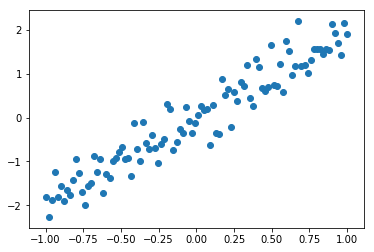

In [3]:
xx = np.linspace(-1,1,100)
yy = 2 * xx + np.random.randn(*xx.shape)*0.33
plt.scatter(xx, yy)
plt.show()

w =  1.9186828


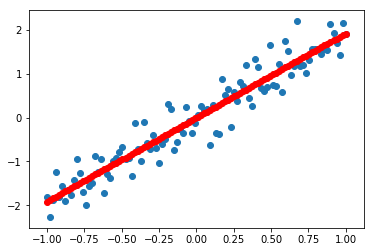

In [4]:
def model(X, w):
    #multiplies X by the single weight coefficient --> y = X * w 
    return tf.multiply(X, w)

def LinearRegression(xx, yy, epochs = 100, viz = True):
    #single weight linear regression y = x*w
    X = tf.placeholder("float")   # initialize x variable
    Y = tf.placeholder("float")   # initialize y variable
    w = tf.Variable(0.0, name = "weights")  # shared variable initialization. IDK what this is yet. 
    
    y_model = model(X,w)
    cost = (tf.square(Y-y_model))
    train_optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
    with tf.Session() as sess:
        tf.global_variables_initializer().run()
        
        for i in range (epochs):
            for (x, y) in zip(xx, yy):
                sess.run(train_optimizer, feed_dict = {X:x, Y:y})
                       
        #Visualization Section        
        print('w = ', sess.run(w))
        if viz:
            plt.figure()
            plt.scatter(xx, yy)
            yyy = xx*sess.run(w)
            plt.scatter(xx, yyy, c = 'r')
            plt.show()
        
LinearRegression(xx,yy)

## 0.2 Logistic Regression

In [5]:
from tensorflow.examples.tutorials.mnist import input_data